<a href="https://colab.research.google.com/github/ManuelPerezOrt/Reducci-n-de-Dimensionalidad-y-Transformaciones-para-An-lisis-de-Datos/blob/main/PP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

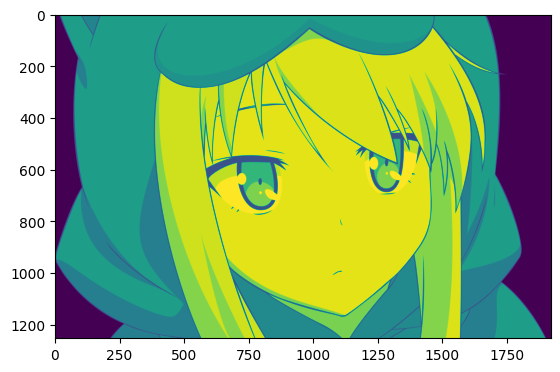

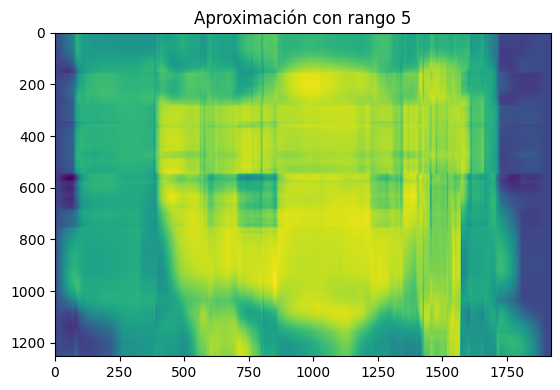

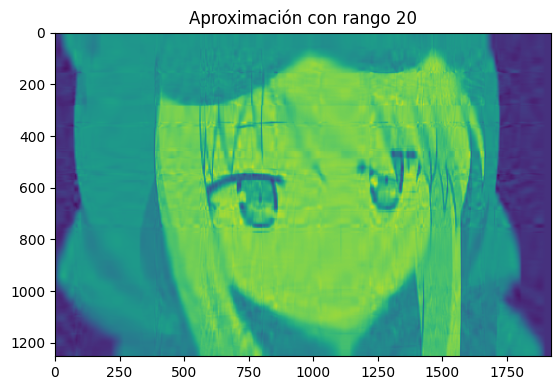

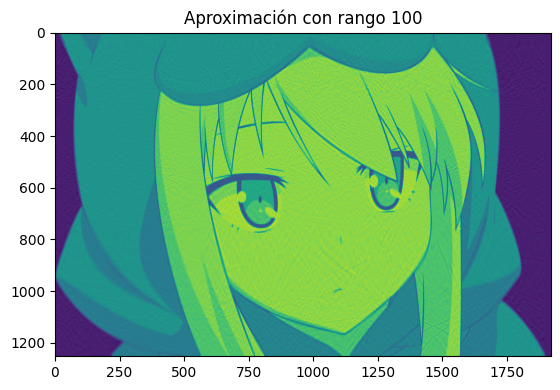

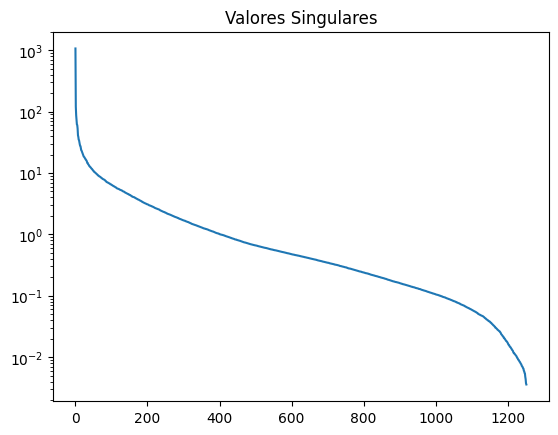

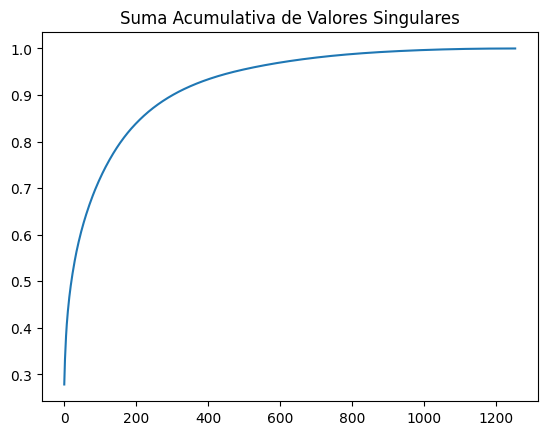

In [ ]:
# First, we load the image
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

A = imread(os.path.join('/content', 'thumb-1920-844868.png'))
X = np.mean(A, -1)  # Convert RGB to grayscale
img = plt.imshow(X)

# Take the SVD
U, S, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)

# Approximate matrix with truncated SVD for various ranks r
for r in (5, 20, 100):
    # Construct approximate image
    Xapprox = U[:, :r] @ S[0:r, :r] @ VT[:r, :]
    plt.figure()
    plt.imshow(Xapprox)
    plt.title(f'Aproximación con rango {r}')
    plt.show()

# Plot singular values and cumulative sum
plt.figure()
plt.semilogy(np.diag(S))
plt.title('Valores Singulares')
plt.figure()
plt.plot(np.cumsum(np.diag(S)) / np.sum(np.diag(S)))
plt.title('Suma Acumulativa de Valores Singulares')
plt.show()


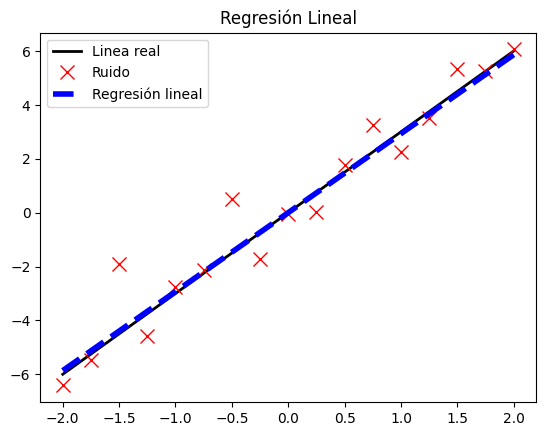

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos ruidosos
x = 3  # Pendiente verdadera
a = np.arange(-2, 2.25, 0.25).reshape(-1, 1)
b = x * a + np.random.randn(*a.shape)  # Añadir ruido

# Relación verdadera
plt.plot(a, x * a, color='k', linewidth=2, label='Linea real')
# Medidas ruidosas
plt.plot(a, b, 'x', color='r', markersize=10, label='Ruido')

# Calcular aproximación de mínimos cuadrados con SVD
U, S, VT = np.linalg.svd(a, full_matrices=False)
xtilde = VT.T @ np.linalg.pinv(np.diag(S)) @ U.T @ b  # Ajuste de mínimos cuadrados
plt.plot(a, xtilde * a, '--', color='b', linewidth=4, label='Regresión lineal')

# Formulaciones alternativas de mínimos cuadrados
xtilde1 = VT.T @ np.linalg.pinv(np.diag(S)) @ U.T @ b
xtilde2 = np.linalg.pinv(a) @ b

plt.legend()
plt.title('Regresión Lineal')
plt.show()


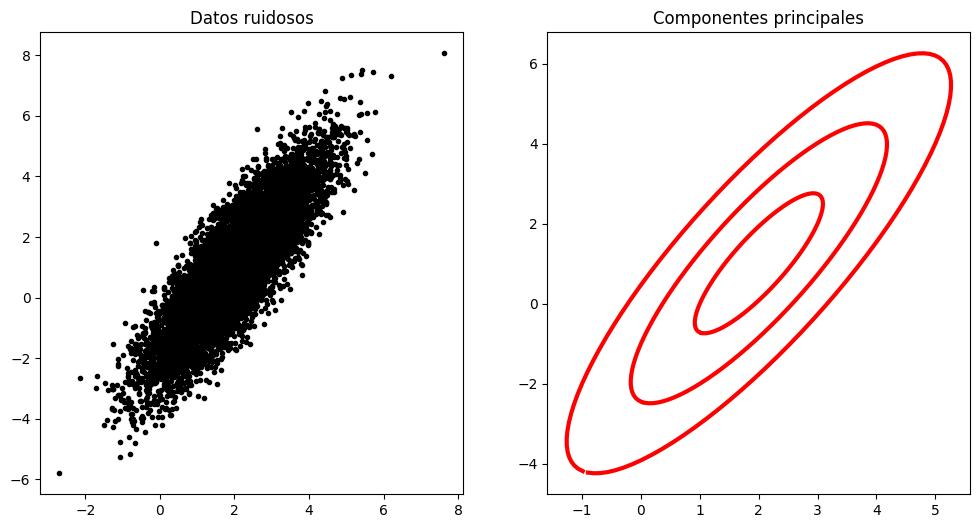

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generar nube de datos ruidosos
xC = np.array([2, 1])  # Centro de los datos (media)
sig = np.array([2, 0.5])  # Ejes principales
theta = np.pi / 3  # Rotar nube por pi/3
R = np.array([[np.cos(theta), -np.sin(theta)],  # Matriz de rotación
              [np.sin(theta), np.cos(theta)]])
nPoints = 10000  # Crear 10,000 puntos
X = R @ np.diag(sig) @ np.random.randn(2, nPoints) + np.diag(xC) @ np.ones((2, nPoints))

# Graficar datos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(X[0, :], X[1, :], '.', color='k')
ax1.set_title('Datos ruidosos')

# Calcular la media
Xavg = np.mean(X, axis=1)

# Datos centrados en la media
B = X - np.tile(Xavg, (nPoints, 1)).T

# Encontrar componentes principales (SVD)
U, S, VT = np.linalg.svd(B / np.sqrt(nPoints), full_matrices=False)
theta = 2 * np.pi * np.arange(0, 1, 0.01)
Xstd = U @ np.diag(S) @ np.array([np.cos(theta), np.sin(theta)])

# Graficar componentes principales
Xavg_reshaped = Xavg[:, np.newaxis]

ax2.plot(Xavg_reshaped[0, :] + Xstd[0, :], Xavg_reshaped[1, :] + Xstd[1, :], '-', color='r', linewidth=3)
ax2.plot(Xavg_reshaped[0, :] + 2 * Xstd[0, :], Xavg_reshaped[1, :] + 2 * Xstd[1, :], '-', color='r', linewidth=3)
ax2.plot(Xavg_reshaped[0, :] + 3 * Xstd[0, :], Xavg_reshaped[1, :] + 3 * Xstd[1, :], '-', color='r', linewidth=3)
ax2.set_title('Componentes principales')
plt.show()



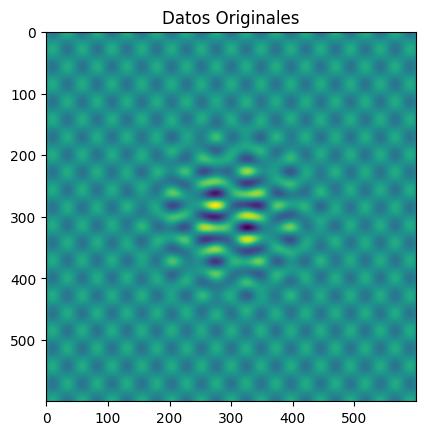

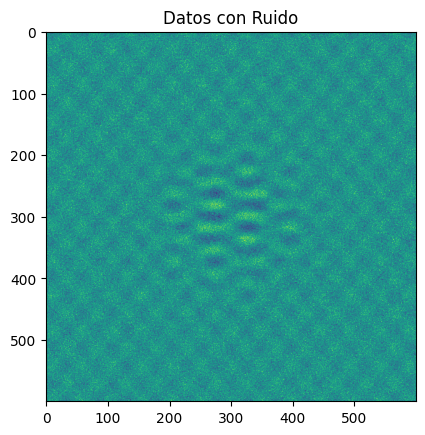

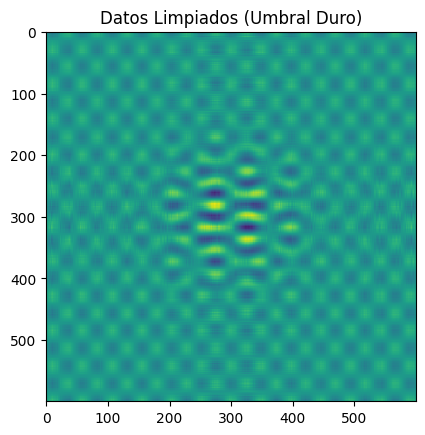

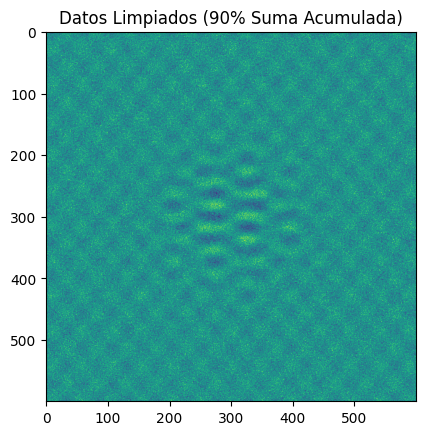

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos subyacentes de bajo rango
t = np.arange(-3, 3, 0.01)
Utrue = np.array([np.cos(17 * t) * np.exp(-t**2), np.sin(11 * t)]).T
Strue = np.array([[2, 0], [0, 0.5]])
Vtrue = np.array([np.sin(5 * t) * np.exp(-t**2), np.cos(13 * t)]).T
X = Utrue @ Strue @ Vtrue.T
plt.imshow(X)
plt.title('Datos Originales')
plt.show()

# Contaminar la señal con ruido
sigma = 1
Xnoisy = X + sigma * np.random.randn(*X.shape)
plt.imshow(Xnoisy)
plt.title('Datos con Ruido')
plt.show()

# Truncar usando umbral duro óptimo
U, S, VT = np.linalg.svd(Xnoisy, full_matrices=False)
n = min(Xnoisy.shape)  # Obtener la dimensión más pequeña de Xnoisy
cutoff = (4 / np.sqrt(3)) * np.sqrt(n) * sigma  # Umbral duro, usando n en lugar de N
r = np.max(np.where(S > cutoff))  # Mantener modos con S > umbral
Xclean = U[:, :(r + 1)] @ np.diag(S[:(r + 1)]) @ VT[:(r + 1), :]
plt.imshow(Xclean)
plt.title('Datos Limpiados (Umbral Duro)')
plt.show()


# Truncar para mantener el 90% de la suma acumulada
cdS = np.cumsum(S) / np.sum(S)  # Energía acumulada
r90 = np.min(np.where(cdS > 0.90))  # Encontrar r para mantener el 90% de la suma
X90 = U[:, :(r90 + 1)] @ np.diag(S[:(r90 + 1)]) @ VT[:(r90 + 1), :]
plt.imshow(X90)
plt.title('Datos Limpiados (90% Suma Acumulada)')
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import seaborn as sns

from sklearn.decomposition import FastICA, PCA

In [ ]:
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time*10) # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time)) # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time) # Signal 3 : saw tooth signal

<function matplotlib.pyplot.show(close=None, block=None)>

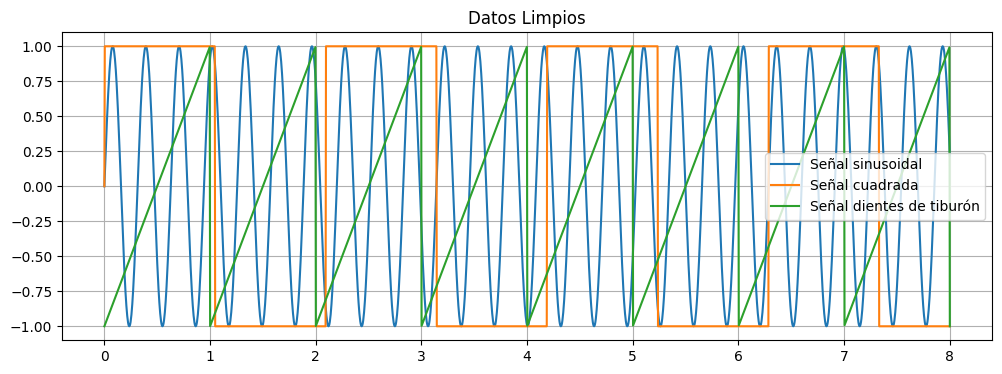

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(time, s1, label='Señal sinusoidal')
plt.plot(time, s2, label='Señal cuadrada')
plt.plot(time, s3, label='Señal dientes de tiburón')
plt.grid()
plt.legend()
plt.title('Datos Limpios')
plt.show

<ipython-input-14-4a5228123ab7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s1, ax=ax, rug=True)
<ipython-input-14-4a5228123ab7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s2, ax=ax, rug=True)
<ipython-input-14-4a5228123ab7>:11: UserWarning: 

`distplot` is a deprecated function and w

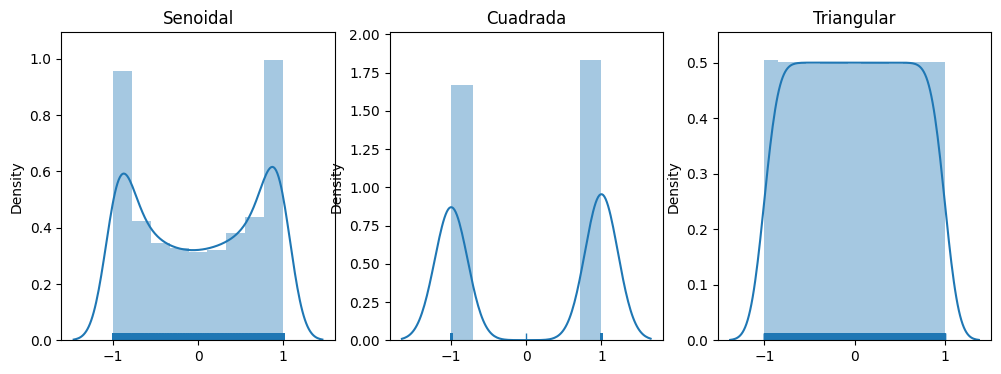

In [ ]:
plt.figure(figsize=(12, 4))
ax = plt.subplot(1,3,1)
sns.distplot(s1, ax=ax, rug=True)
plt.title('Senoidal')

ax = plt.subplot(1,3,2)
sns.distplot(s2, ax=ax, rug=True)
plt.title('Cuadrada')

ax = plt.subplot(1,3,3)
sns.distplot(s3, ax=ax, rug=True)
plt.title('Triangular')

plt.show()


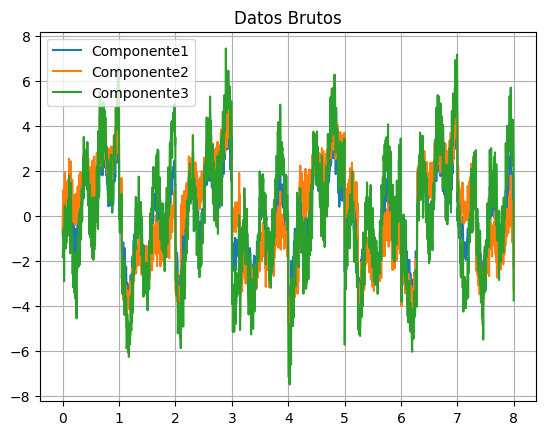

In [ ]:
S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape) # Add noise
S /= S.std(axis=0) # Standardize data

A = np.array([[1, 1, 1], [0.5, 2, 1], [1.5, 1, 2]]) # Mixing matrix
X = np.dot(S, A.T) # Generate observations

plt.plot(time,X[:,0],label='Componente1')
plt.plot(time,X[:,1],label='Componente2')
plt.plot(time,X[:,2],label='Componente3')
plt.grid()
plt.legend()
plt.title('Datos Brutos')
plt.show()


In [ ]:
#Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X) # Reconstruct signals
A_ = ica.mixing_

# We can 'proves that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)
# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X) # Reconstruct signals based on orthogonal components

In [ ]:
print(A_)
print(A)
print(S_.shape)

[[-1.01000491  0.97901242  0.95219399]
 [-0.50452125  1.96886428  0.96625092]
 [-1.52652185  0.94795152  1.93091096]]
[[1.  1.  1. ]
 [0.5 2.  1. ]
 [1.5 1.  2. ]]
(2000, 3)


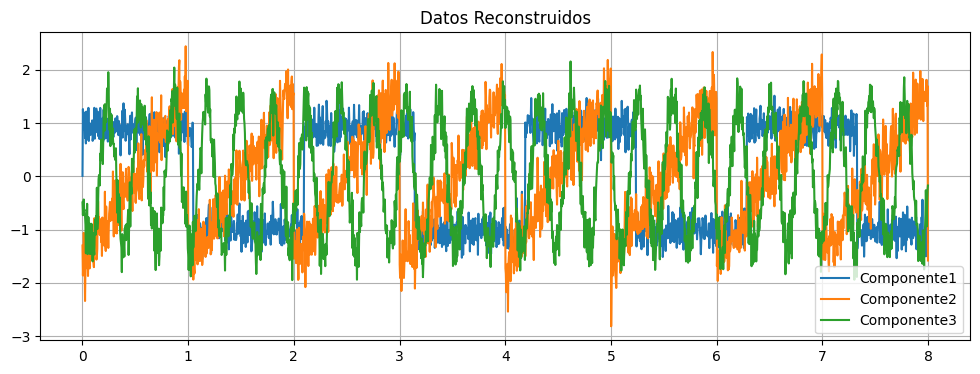

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(time,S_[:,0],label='Componente1')
plt.plot(time,S_[:,1],label='Componente2')
plt.plot(time,S_[:,2],label='Componente3')
plt.grid()
plt.legend()
plt.title('Datos Reconstruidos')
plt.show()

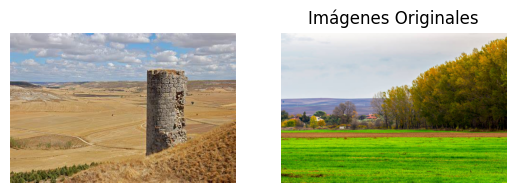

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Cargar las imágenes
S1 = Image.open('campo.jpeg')
S2 = Image.open('campo3.jpg')

# Mostrar las imágenes en subplots
plt.subplot(2, 2, 1)
plt.imshow(S1)
plt.axis('off')  # Ocultar los ejes

plt.subplot(2, 2, 2)
plt.imshow(S2)
plt.axis('off')  # Ocultar los ejes

plt.title('Imágenes Originales')
plt.show()


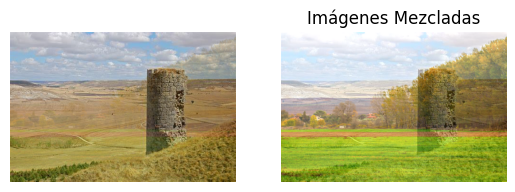

In [69]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Función para redimensionar imágenes
def resize_image(image, size):
    return np.array(Image.fromarray(image).resize(size))

# Cargar las imágenes
S1 = np.array(Image.open('campo.jpeg'))
S2 = np.array(Image.open('campo3.jpg'))

# Redimensionar S2 para que coincida con las dimensiones de S1
S2_resized = resize_image(S2, (S1.shape[1], S1.shape[0]))

# Matriz de mezcla
A = np.array([[0.8, 0.2], [0.5, 2/3]])

# Crear las imágenes mezcladas
X1 = A[0, 0] * S1 + A[0, 1] * S2_resized
X2 = A[1, 0] * S1 + A[1, 1] * S2_resized

# Asegurarse de que los valores estén en el rango correcto
X1 = np.clip(X1, 0, 255).astype(np.uint8)
X2 = np.clip(X2, 0, 255).astype(np.uint8)

# Mostrar las imágenes mezcladas
plt.subplot(2, 2, 1)
plt.imshow(X1)
plt.axis('off')  # Ocultar los ejes

plt.subplot(2, 2, 2)
plt.imshow(X2)
plt.axis('off')  # Ocultar los ejes

plt.title('Imágenes Mezcladas')
plt.show()


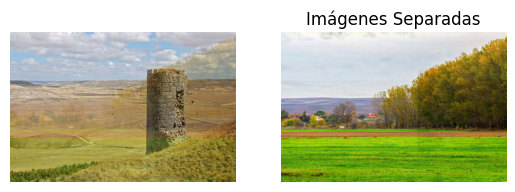

In [70]:
import numpy as np

# Obtener las dimensiones de X1
m, n = X1.shape[:2]

# Aplanar las imágenes
x1 = X1.reshape(m * n, -1)
x2 = X2.reshape(m * n, -1)

# Restar la media
x1 = x1 - np.mean(x1)
x2 = x2 - np.mean(x2)

# Calcular theta0
theta0 = 0.5 * np.arctan(-2 * np.sum(x1 * x2) / np.sum(x1**2 - x2**2))

# Matriz de rotación Us
Us = np.array([[np.cos(theta0), np.sin(theta0)], [-np.sin(theta0), np.cos(theta0)]])

#print("theta0:", theta0)
#print("Us:", Us)

# Calcular sig1 y sig2
sig1 = np.sum((x1 * np.cos(theta0) + x2 * np.sin(theta0))**2)
sig2 = np.sum((x1 * np.cos(theta0 - np.pi/2) + x2 * np.sin(theta0 - np.pi/2))**2)

# Crear la matriz Sigma
Sigma = np.array([[1 / np.sqrt(sig1), 0], [0, 1 / np.sqrt(sig2)]])

#print("sig1:", sig1)
#print("sig2:", sig2)
#print("Sigma:", Sigma)

# Calcular X1bar y X2bar
X1bar = Sigma[0, 0] * (Us[0, 0] * X1 + Us[0, 1] * X2)
X2bar = Sigma[1, 1] * (Us[1, 0] * X1 + Us[1, 1] * X2)

# Aplanar las imágenes
x1bar = X1bar.reshape(m * n, -1)
x2bar = X2bar.reshape(m * n, -1)

# Calcular phi0
phi0 = 0.25 * np.arctan(-np.sum(2 * (x1bar**3) * x2bar - 2 * x1bar * (x2bar**3)) /
                        np.sum(3 * (x1bar**2) * (x2bar**2) - 0.5 * (x1bar**4) - 0.5 * (x2bar**4)))

# Matriz de rotación V
V = np.array([[np.cos(phi0), np.sin(phi0)], [-np.sin(phi0), np.cos(phi0)]])

# Calcular S1bar y S2bar
S1bar = V[0, 0] * X1bar + V[0, 1] * X2bar
S2bar = V[1, 0] * X1bar + V[1, 1] * X2bar

#print("phi0:", phi0)
#print("V:", V)
#print("S1bar:", S1bar)
#print("S2bar:", S2bar)

# Calcular min1, max1, min2, max2 y normalizar S1bar y S2bar
min1 = np.min(S1bar)
S1bar = S1bar - min1
max1 = np.max(S1bar)
S1bar = S1bar * (255 / max1)

min2 = np.min(S2bar)
S2bar = S2bar - min2
max2 = np.max(S2bar)
S2bar = S2bar * (255 / max2)

# Mostrar las imágenes normalizadas
plt.subplot(2, 2, 3)
plt.imshow(S1bar.astype(np.uint8))
plt.axis('off')  # Ocultar los ejes

plt.subplot(2, 2, 4)
plt.imshow(S2bar.astype(np.uint8))
plt.axis('off')  # Ocultar los ejes

plt.title('Imágenes Separadas')
plt.show()

In [ ]:
import skimage
import numpy as np
from skimage import io
from skimage.transform import resize
import matplotlib.pyplot as plt
import matplotlib.image as mp

def mixSounds(sound_list, weights):
  mixSound = np.zeros(sound_list[0].shape)
  for i in range(len(sound_list)):
    mixSound += weights[i] * sound_list[i]
  return mixSound

def plotSound(sound_list, name_list, samplerate, path, toSave=False):
  times = np.arange(0, len(sound_list[0]))/float(samplerate)
  fig = plt.figure(figsize=(15,4))
  imageCoordinate = 100 + 10*len(sound_list) + 1
  i = 0

  for sound in sound_list:
    fig.add_subplot(imageCoordinate)
    plt.fill_between(times, sound, color="k")
    plt.xlim(times[0], times[-1])
    plt.title(name_list[i])
    plt.xlabel('time (s)')
    plt.ylabel('amplitud')
    plt.plot(sound)

    imageCoordinate += 1
    i += 1

  if toSave:
    plt.savefig(path + ".jpg", bbox_inches='tight')
  else:
    plt.show()

Saving sourceX.wav to sourceX.wav
Saving sourceY.wav to sourceY.wav


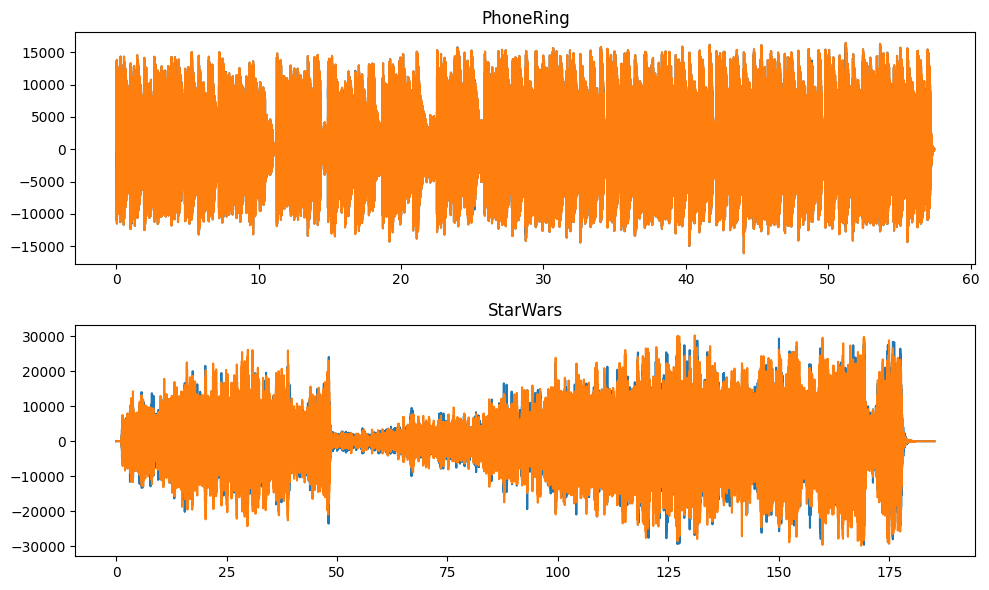

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os

# Asegúrate de que los archivos de audio estén en el entorno de Colab
from google.colab import files
uploaded = files.upload()

# Leer los archivos de audio
rate1, data1 = wavfile.read('sourceX.wav')
rate2, data2 = wavfile.read('sourceY.wav')

# Función para plotear los sonidos
def plotSounds(data_list, labels, rate, save_path):
    fig, axs = plt.subplots(len(data_list), 1, figsize=(10, 6))
    for i, data in enumerate(data_list):
        time = np.linspace(0, len(data) / rate, num=len(data))
        axs[i].plot(time, data)
        axs[i].set_title(labels[i])
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

# Plotear los sonidos originales
plotSounds([data1, data2], ['PhoneRing', 'StarWars'], rate1, 'Ring_StarWars_original.png')

# Asegurarse de que ambas señales tengan la misma longitud
minimum = min(data1.shape[0], data2.shape[0])
data1 = data1[:minimum]
data2 = data2[:minimum]

# Modificar los datos dividiendo la suma entre 2
modified_data1 = (data1 + data2) / 2
modified_data2 = (data1 + data2) / 2

# Guardar los archivos de audio modificados
wavfile.write('sourceX_modified.wav', rate1, modified_data1.astype(data1.dtype))
wavfile.write('sourceY_modified.wav', rate2, modified_data2.astype(data2.dtype))

# Descargar los archivos modificados
files.download('sourceX_modified.wav')
files.download('sourceY_modified.wav')


Saving sourceX.wav to sourceX (1).wav
Saving sourceY.wav to sourceY (1).wav


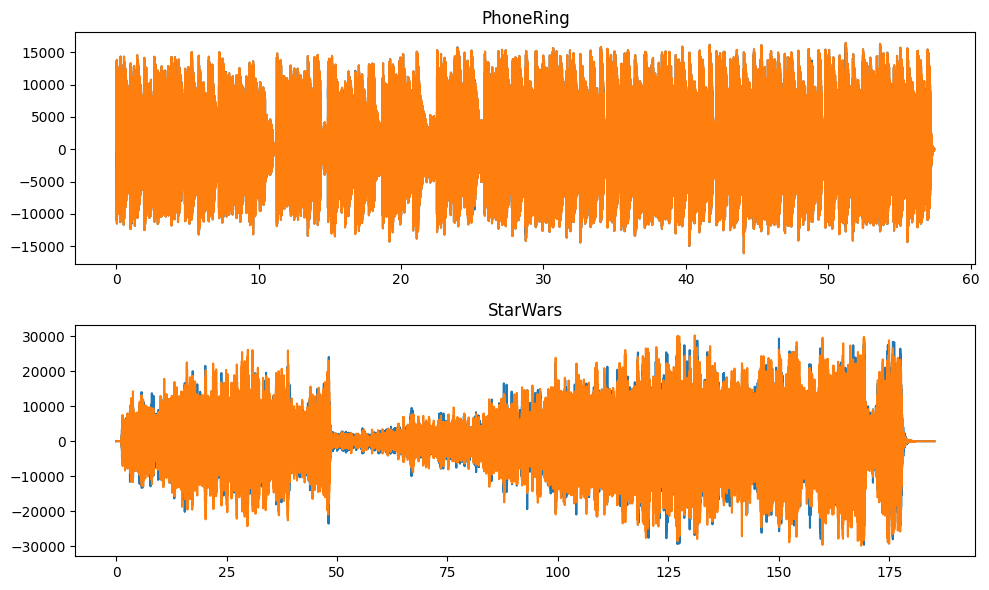

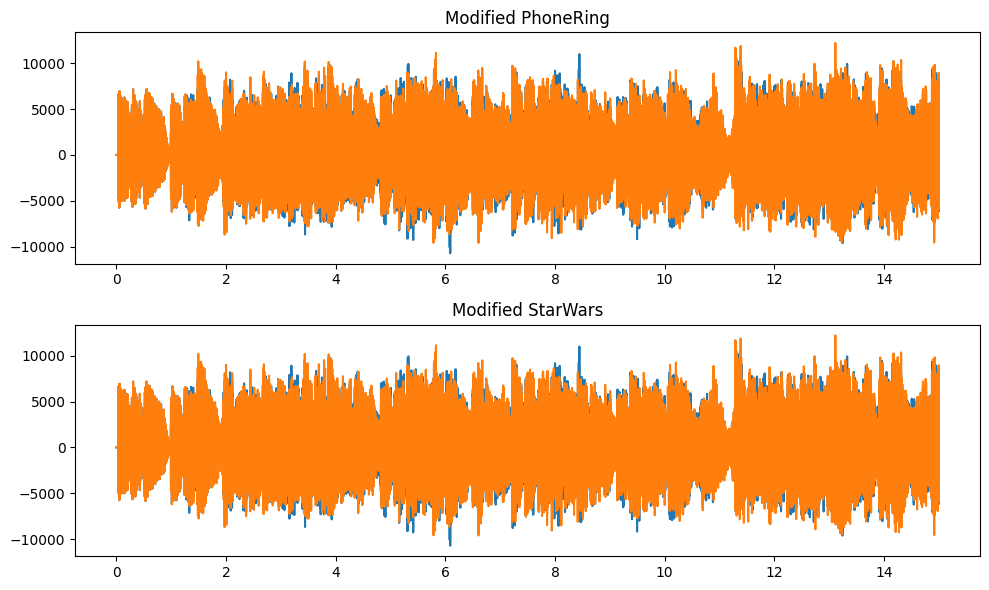

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os

# Asegúrate de que los archivos de audio estén en el entorno de Colab
from google.colab import files
uploaded = files.upload()

# Leer los archivos de audio
rate1, data1 = wavfile.read('sourceX.wav')
rate2, data2 = wavfile.read('sourceY.wav')

# Función para plotear los sonidos
def plotSounds(data_list, labels, rate, save_path):
    fig, axs = plt.subplots(len(data_list), 1, figsize=(10, 6))
    for i, data in enumerate(data_list):
        time = np.linspace(0, len(data) / rate, num=len(data))
        axs[i].plot(time, data)
        axs[i].set_title(labels[i])
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

# Plotear los sonidos originales
plotSounds([data1, data2], ['PhoneRing', 'StarWars'], rate1, 'Ring_StarWars_original.png')

# Asegurarse de que ambas señales tengan la misma longitud
minimum = min(data1.shape[0], data2.shape[0])
data1 = data1[:minimum]
data2 = data2[:minimum]

# Modificar los datos dividiendo la suma entre 2
modified_data1 = (data1 + data2) / 2
modified_data2 = (data1 + data2) / 2

# Definir la duración deseada en segundos
desired_duration = 15  # segundos
desired_samples = desired_duration * rate1  # número de muestras

# Recortar o repetir las señales modificadas para que tengan 15 segundos de duración
if len(modified_data1) > desired_samples:
    modified_data1 = modified_data1[:desired_samples]
else:
    # Repetir si es más corto
    modified_data1 = np.tile(modified_data1, (desired_samples // len(modified_data1)) + 1)[:desired_samples]

if len(modified_data2) > desired_samples:
    modified_data2 = modified_data2[:desired_samples]
else:
    # Repetir si es más corto
    modified_data2 = np.tile(modified_data2, (desired_samples // len(modified_data2)) + 1)[:desired_samples]

# Plotear las señales modificadas
plotSounds([modified_data1, modified_data2], ['Modified PhoneRing', 'Modified StarWars'], rate1, 'Ring_StarWars_modified.png')

# Guardar los archivos de audio modificados
wavfile.write('sourceX_modified.wav', rate1, modified_data1.astype(data1.dtype))
wavfile.write('sourceY_modified.wav', rate2, modified_data2.astype(data2.dtype))

# Descargar los archivos modificados
files.download('sourceX_modified.wav')
files.download('sourceY_modified.wav')



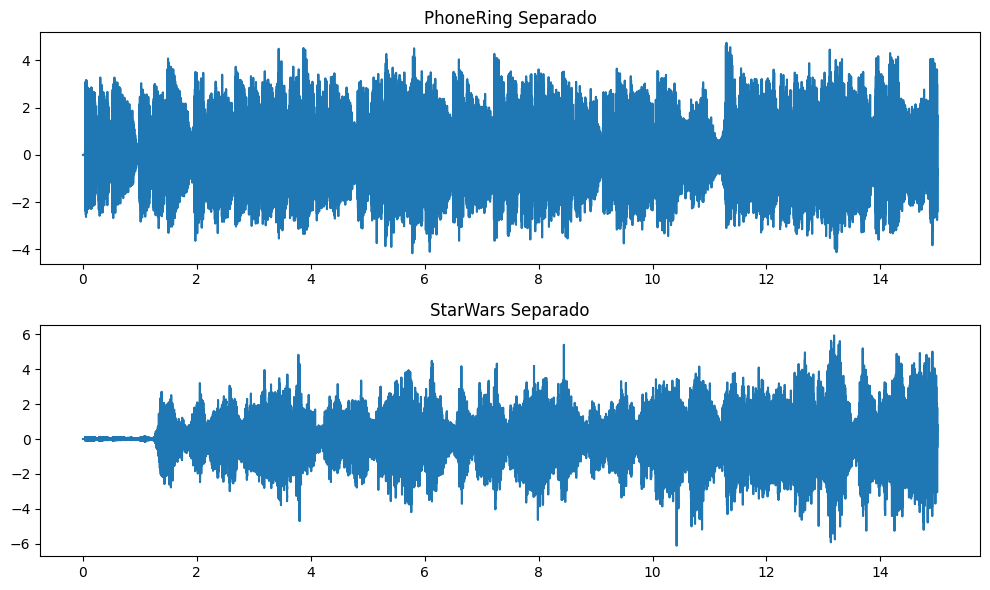

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
from scipy.io import wavfile
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

# Función para blanquear la matriz
def whitenMatrix(X):
    # Centrar los datos
    X_centered = X - np.mean(X, axis=0)
    # Calcular la matriz de covarianza
    cov = np.cov(X_centered, rowvar=False)
    # Calcular los vectores y valores propios
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    # Eliminar los valores propios cero (o muy pequeños)
    d = eigenvalues > 1e-5
    W = eigenvectors[:, d] / np.sqrt(eigenvalues[d])
    return np.dot(X_centered, W)

# Función para plotear las señales
def plotSounds(data_list, labels, rate, save_path):
    fig, axs = plt.subplots(len(data_list), 1, figsize=(10, 6))
    for i, data in enumerate(data_list):
        time = np.linspace(0, len(data) / rate, num=len(data))
        axs[i].plot(time, data)
        axs[i].set_title(labels[i])
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

# Leer los archivos de audio modificados
rate1, data1 = wavfile.read('sourceX_modified.wav')
rate2, data2 = wavfile.read('sourceY_modified.wav')

# Preprocesar los datos
data1 = data1 - np.mean(data1)
data1 = data1 / 32768
data2 = data2 - np.mean(data2)
data2 = data2 / 32768

# Crear la matriz de señales
signals = [data1, data2]
matrix = np.vstack(signals)

# Blanquear la matriz
whiteMatrix = whitenMatrix(matrix)
X = whiteMatrix

# Aplicar FastICA
ica = FastICA(n_components=2, random_state=0)
S = ica.fit_transform(X)

# Definir la duración deseada en segundos
desired_duration = 15  # segundos
desired_samples = desired_duration * rate1  # número de muestras

# Recortar o repetir las señales separadas para que tengan 15 segundos de duración
S_15s = []
for signal in S.T:  # Transponemos para iterar por las señales
    if len(signal) > desired_samples:
        S_15s.append(signal[:desired_samples])  # Recortar
    else:
        # Repetir si es más corto
        repeated_signal = np.tile(signal, (desired_samples // len(signal)) + 1)[:desired_samples]
        S_15s.append(repeated_signal)

# Convertir la lista de señales de 15 segundos a un arreglo
S_15s = np.array(S_15s).T  # Volver a transponer para la forma correcta

# Graficar las señales separadas de 15 segundos
plotSounds([S_15s[:, 0], S_15s[:, 1]], ['PhoneRing Separado', 'StarWars Separado'], rate1, 'Ring_StarWars_Separado.png')

# Guardar las señales separadas de 15 segundos como archivos de audio
wavfile.write('sourceX_separated.wav', rate1, (S_15s[:, 0] * 32768).astype(np.int16))
wavfile.write('sourceY_separated.wav', rate2, (S_15s[:, 1] * 32768).astype(np.int16))

